In [1]:
from google.colab import files
uploaded = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (1).csv

🔍 Logistic Regression Evaluation
Accuracy: 0.7853589196872779
ROC AUC: 0.8307380507426062
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407


🔍 Random Forest Evaluation
Accuracy: 0.7903340440653873
ROC AUC: 0.813891577928364
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



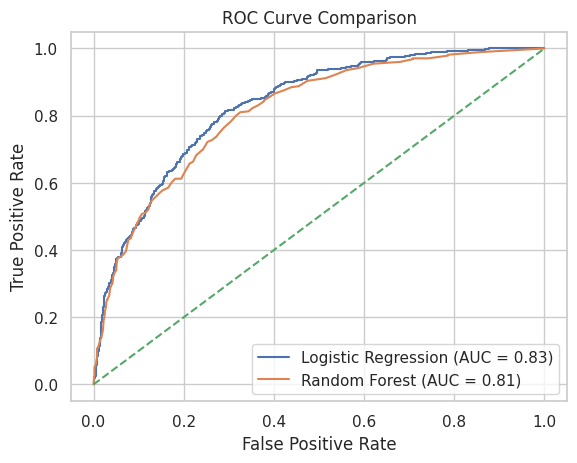

In [2]:
# ✅ STEP 1: Install & Upload Dataset
!pip install -q scikit-learn pandas seaborn matplotlib
from google.colab import files
uploaded = files.upload()

# ✅ STEP 2: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

sns.set(style='whitegrid')

# ✅ STEP 3: Load Data
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# ✅ STEP 4: Clean Data
df.dropna(inplace=True)
df.drop(['customerID'], axis=1, inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(subset=['TotalCharges'], inplace=True)

# ✅ STEP 5: Encode Categorical Columns
for col in df.select_dtypes(include='object').columns:
    if col != 'Churn':
        df[col] = LabelEncoder().fit_transform(df[col])
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# ✅ STEP 6: Train-Test Split
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ STEP 7: Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ STEP 8: Train Models
log_model = LogisticRegression()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# ✅ STEP 9: Evaluate
for name, model in zip(['Logistic Regression', 'Random Forest'], [log_model, rf_model]):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    print(f"\n🔍 {name} Evaluation")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("ROC AUC:", roc_auc_score(y_test, y_prob))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()
